In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_excel("Datasets Superstore.xlsx")
df.head

<bound method NDFrame.head of       Row ID        Order ID Order Date  Year     Month  Day       Ship Mode  \
0          1  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
1          2  CA-2016-152156 2016-11-08  2016  November    8    Second Class   
2          3  CA-2016-138688 2016-06-12  2016      Juni   12    Second Class   
3          4  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   
4          5  US-2015-108966 2015-10-11  2015   Oktober   11  Standard Class   
...      ...             ...        ...   ...       ...  ...             ...   
9989    9990  CA-2014-110422 2014-01-21  2014   Januari   21    Second Class   
9990    9991  CA-2017-121258 2017-02-26  2017  Februari   26  Standard Class   
9991    9992  CA-2017-121258 2017-02-26  2017  Februari   26  Standard Class   
9992    9993  CA-2017-121258 2017-02-26  2017  Februari   26  Standard Class   
9993    9994  CA-2017-119914 2017-05-04  2017       Mei    4    Second Class   

     Cust

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Year           9994 non-null   int64         
 4   Month          9994 non-null   object        
 5   Day            9994 non-null   int64         
 6   Ship Mode      9994 non-null   object        
 7   Customer ID    9994 non-null   object        
 8   Customer Name  9994 non-null   object        
 9   Segment        9994 non-null   object        
 10  Country        9994 non-null   object        
 11  City           9994 non-null   object        
 12  State          9994 non-null   object        
 13  Postal Code    9994 non-null   int64         
 14  Region         9994 non-null   object        
 15  Product ID     9994 n

Langkah 2 : Eksplorasi Data

In [9]:
print("\nMissing values:\n" , df.isnull().sum)



Missing values:
 <bound method DataFrame.sum of       Row ID  Order ID  Order Date   Year  Month    Day  Ship Mode  \
0      False     False       False  False  False  False      False   
1      False     False       False  False  False  False      False   
2      False     False       False  False  False  False      False   
3      False     False       False  False  False  False      False   
4      False     False       False  False  False  False      False   
...      ...       ...         ...    ...    ...    ...        ...   
9989   False     False       False  False  False  False      False   
9990   False     False       False  False  False  False      False   
9991   False     False       False  False  False  False      False   
9992   False     False       False  False  False  False      False   
9993   False     False       False  False  False  False      False   

      Customer ID  Customer Name  Segment  ...  Postal Code  Region  \
0           False          False    Fal

In [10]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Year', 'Month', 'Day', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Langkah 3 : Visualisasi

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

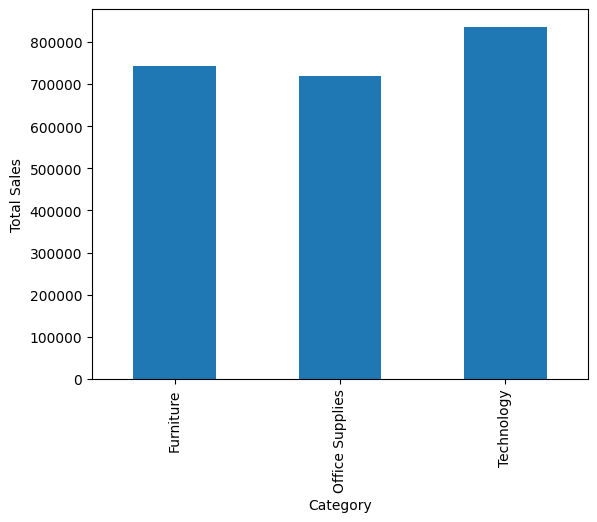

In [12]:
df.groupby('Category')['Sales'].sum().plot(kind = 'bar')
plt.ylabel('Total Sales')
plt.show()

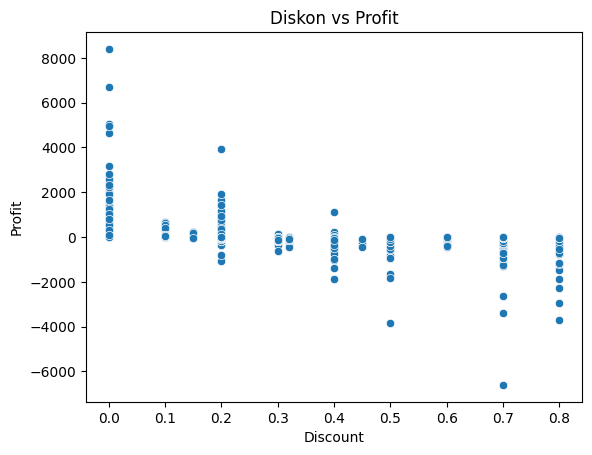

In [13]:
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Diskon vs Profit')
plt.show()

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)
features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']

In [16]:
x_train, x_test, y_train, y_test, = train_test_split(features, labels, test_size=0.3, random_state=42)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [17]:
print("classification report :\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

classification report :
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       547
           1       0.96      0.96      0.96      2452

    accuracy                           0.93      2999
   macro avg       0.89      0.89      0.89      2999
weighted avg       0.93      0.93      0.93      2999

Confusion Matrix:
 [[ 442  105]
 [  93 2359]]


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#LabelEncoder: Mengubah label kategori menjadi angka
#StandardScaler: Melakukan penskalaan fitur (standarisasi) untuk membuat data memiliki rata-rata 0 dan varians 1
from sklearn.preprocessing import LabelEncoder, StandardScaler 

#train_test_split: Membagi data 
from sklearn.model_selection import train_test_split

#GaussianNB: penerapan algo Naive Bayes yang mengasumsikan data berdistribusi Gaussian (normal).
from sklearn.naive_bayes import GaussianNB

#LogisticRegression: Implementasi algoritma Regresi Logistik untuk klasifikasi.
from sklearn.linear_model import LogisticRegression

#RandomForestClassifier: Implementasi algoritma Random Forest, metode ensemble untuk klasifikasi.
from sklearn.ensemble import RandomForestClassifier

#MLPClassifier: Implementasi jaringan saraf tiruan multilayer perceptron untuk klasifikasi.
from sklearn.neural_network import MLPClassifier

#mengukur kinerja  model klasifikasi
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix)

In [34]:
df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)
features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.66      0.79       547
           1       0.93      1.00      0.96      2452

    accuracy                           0.93      2999
   macro avg       0.95      0.83      0.87      2999
weighted avg       0.94      0.93      0.93      2999

Confusion Matrix:
 [[ 360  187]
 [   9 2443]]


In [35]:
df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)
features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.67      0.80       547
           1       0.93      1.00      0.96      2452

    accuracy                           0.94      2999
   macro avg       0.95      0.83      0.88      2999
weighted avg       0.94      0.94      0.93      2999

Confusion Matrix:
 [[ 368  179]
 [  10 2442]]


In [36]:

df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)
features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       547
           1       0.96      0.97      0.96      2452

    accuracy                           0.94      2999
   macro avg       0.90      0.89      0.89      2999
weighted avg       0.94      0.94      0.94      2999

Confusion Matrix:
 [[ 443  104]
 [  85 2367]]


In [37]:

df['Label'] = df['Profit'].apply(lambda x: 1 if x > 0 else 0)
features = df[['Sales', 'Discount', 'Quantity']].fillna(0)
labels = df['Label']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
model = MLPClassifier(hidden_layer_sizes=(50,25), max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.48      0.65       547
           1       0.90      1.00      0.95      2452

    accuracy                           0.91      2999
   macro avg       0.95      0.74      0.80      2999
weighted avg       0.92      0.91      0.89      2999

Confusion Matrix:
 [[ 263  284]
 [   0 2452]]


# **PENJELASAN**

Model klasifikasi ini dibuat untuk memprediksi apakah suatu transaksi menghasilkan keuntungan (label: 1) atau mengalami kerugian (label: 0). Model yang digunakan adalah Decision Tree, dan performanya diukur dengan Classification Report dan Confusion Matrix.

1. Precision
(Ukuran seberapa tepat prediksi kelas itu.)

Precision kelas 0 (rugi): 0.82
→ Dari seluruh prediksi "rugi", 82% benar-benar rugi.

Precision kelas 1 (untung): 0.96
→ Dari seluruh prediksi "untung", 96% benar-benar untung.

2. Recall
(Ukuran seberapa banyak kasus aktual yang berhasil ditemukan.)

Recall kelas 0 (rugi): 0.81
→ Dari semua transaksi yang sebenarnya rugi, 81% berhasil terdeteksi.

Recall kelas 1 (untung): 0.96
→ Dari semua transaksi yang sebenarnya untung, 96% berhasil dikenali.

3. F1-Score
Kombinasi precision dan recall (semakin mendekati 1 semakin baik).

F1 untuk kelas 0: 0.81, kelas 1: 0.96 → artinya model lebih kuat dalam memprediksi keuntungan.

4. Support
Jumlah data sebenarnya untuk tiap kelas.

Rugi: 547, Untung: 2452 (berarti data tidak seimbang, lebih banyak transaksi untung).

Accuracy (akurasi keseluruhan): 93% dari semua prediksi benar.

Macro avg: rata-rata precision, recall, f1 tanpa mempertimbangkan jumlah data tiap kelas (berimbang).

Weighted avg: rata-rata dengan memperhitungkan banyaknya data per kelas (lebih representatif).

Model klasifikasi ini dibuat untuk memprediksi apakah suatu transaksi menghasilkan keuntungan (label: 1) atau mengalami kerugian (label: 0). Model yang digunakan adalah naive bayes, dan performanya diukur dengan Classification Report dan Confusion Matrix.

1. Precision
(Ukuran seberapa tepat prediksi kelas itu.)

Precision kelas 0 (rugi): 0.98
→ Dari seluruh prediksi "rugi", 98% benar-benar rugi.

Precision kelas 1 (untung): 0.93
→ Dari seluruh prediksi "untung", 93% benar-benar untung.

2. Recall
(Ukuran seberapa banyak kasus aktual yang berhasil ditemukan.)

Recall kelas 0 (rugi): 0.66
→ Dari semua transaksi yang sebenarnya rugi, 66% berhasil terdeteksi.

Recall kelas 1 (untung): 1.00
→ Dari semua transaksi yang sebenarnya untung 100% berhasil dikenali.

3. F1-Score
Kombinasi precision dan recall (semakin mendekati 1 semakin baik).

F1 untuk kelas 0: 0.79, kelas 1: 0.96 → artinya model lebih kuat dalam memprediksi keuntungan.

4. Support
Jumlah data sebenarnya untuk tiap kelas.

Rugi: 547, Untung: 2452 (berarti data tidak seimbang, lebih banyak transaksi untung).

Accuracy (akurasi keseluruhan): 93% dari semua prediksi benar.

Model klasifikasi ini dibuat untuk memprediksi apakah suatu transaksi menghasilkan keuntungan (label: 1) atau mengalami kerugian (label: 0). Model yang digunakan adalah LOGISTIC REGRESSION, dan performanya diukur dengan Classification Report dan Confusion Matrix.

1. Precision
(Ukuran seberapa tepat prediksi kelas itu.)

Precision kelas 0 (rugi): 0.97
→ Dari seluruh prediksi "rugi", 97% benar-benar rugi.

Precision kelas 1 (untung): 0.93
→ Dari seluruh prediksi "untung", 93% benar-benar untung.

2. Recall
(Ukuran seberapa banyak kasus aktual yang berhasil ditemukan.)

Recall kelas 0 (rugi): 0.67
→ Dari semua transaksi yang sebenarnya rugi, 67% berhasil terdeteksi.

Recall kelas 1 (untung): 1.00
→ Dari semua transaksi yang sebenarnya untung 100% berhasil dikenali.

3. F1-Score
Kombinasi precision dan recall (semakin mendekati 1 semakin baik).

F1 untuk kelas 0: 0.80, kelas 1: 0.96 → artinya model lebih kuat dalam memprediksi keuntungan.

4. Support
Jumlah data sebenarnya untuk tiap kelas.

Rugi: 547, Untung: 2452 (berarti data tidak seimbang, lebih banyak transaksi untung).

Accuracy (akurasi keseluruhan): 94% dari semua prediksi benar.

Model klasifikasi ini dibuat untuk memprediksi apakah suatu transaksi menghasilkan keuntungan (label: 1) atau mengalami kerugian (label: 0). Model yang digunakan adalah RANDOM FOREST, dan performanya diukur dengan Classification Report dan Confusion Matrix.

1. Precision
(Ukuran seberapa tepat prediksi kelas itu.)

Precision kelas 0 (rugi): 0.84
→ Dari seluruh prediksi "rugi", 84% benar-benar rugi.

Precision kelas 1 (untung): 0.96
→ Dari seluruh prediksi "untung", 96% benar-benar untung.

2. Recall
(Ukuran seberapa banyak kasus aktual yang berhasil ditemukan.)

Recall kelas 0 (rugi): 0.81
→ Dari semua transaksi yang sebenarnya rugi, 81% berhasil terdeteksi.

Recall kelas 1 (untung): 0.97
→ Dari semua transaksi yang sebenarnya untung 97% berhasil dikenali.

3. F1-Score
Kombinasi precision dan recall (semakin mendekati 1 semakin baik).

F1 untuk kelas 0: 0.82, kelas 1: 0.96 → artinya model lebih kuat dalam memprediksi keuntungan.

4. Support
Jumlah data sebenarnya untuk tiap kelas.

Rugi: 547, Untung: 2452 (berarti data tidak seimbang, lebih banyak transaksi untung).

Accuracy (akurasi keseluruhan): 94% dari semua prediksi benar.

Model klasifikasi ini dibuat untuk memprediksi apakah suatu transaksi menghasilkan keuntungan (label: 1) atau mengalami kerugian (label: 0). Model yang digunakan adalah  ANN, dan performanya diukur dengan Classification Report dan Confusion Matrix.

1. Precision
(Ukuran seberapa tepat prediksi kelas itu.)

Precision kelas 0 (rugi): 1.00
→ Dari seluruh prediksi "rugi", 100% benar-benar rugi.

Precision kelas 1 (untung): 0.90
→ Dari seluruh prediksi "untung", 90% benar-benar untung.

2. Recall
(Ukuran seberapa banyak kasus aktual yang berhasil ditemukan.)

Recall kelas 0 (rugi): 0.48
→ Dari semua transaksi yang sebenarnya rugi, 48% berhasil terdeteksi.

Recall kelas 1 (untung): 1.00
→ Dari semua transaksi yang sebenarnya untung 100% berhasil dikenali.

3. F1-Score
Kombinasi precision dan recall (semakin mendekati 1 semakin baik).

F1 untuk kelas 0: 0.65, kelas 1: 0.95 → artinya model lebih kuat dalam memprediksi keuntungan.

4. Support
Jumlah data sebenarnya untuk tiap kelas.

Rugi: 547, Untung: 2452 (berarti data tidak seimbang, lebih banyak transaksi untung).

Accuracy (akurasi keseluruhan): 91% dari semua prediksi benar.

Berdasarkan analisis perbandingan lima model klasifikasi (Decision Tree, Naive Bayes, Logistic Regression, Random Forest, dan ANN) untuk memprediksi transaksi menguntungkan atau merugi, dapat disimpulkan bahwa Random Forest menunjukkan performa terbaik secara keseluruhan dengan akurasi 94% dan keseimbangan yang baik antara precision dan recall pada kedua kelas. Logistic Regression juga mencapai akurasi 94% namun dengan recall lebih rendah (67%) untuk kelas rugi. Naive Bayes memiliki precision tertinggi untuk kelas rugi (98%) tetapi recall hanya 66%. Decision Tree menunjukkan keseimbangan yang baik dengan F1-score 0.81 (rugi) dan 0.96 (untung). Sementara ANN memiliki precision sempurna (100%) untuk kelas rugi namun recall terendah (48%), menunjukkan model ini sangat selektif tetapi sering melewatkan transaksi rugi. Semua model menunjukkan performa lebih baik untuk kelas untung, yang mencerminkan ketidakseimbangan dataset (2452 untung vs 547 rugi), dengan confusion matrix mengkonfirmasi kecenderungan model untuk memprediksi kelas mayoritas.